In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir()

['analyze_data.py',
 'cbsi.csv',
 'gdp.csv',
 'gpd_proxy.csv',
 'ipi.csv',
 'ipi_cbsi.csv',
 'ipi_q.csv',
 'real_gdp.csv',
 'test1.ipynb',
 'vkospi_1.csv',
 'vkospi_10.csv',
 'vkospi_11.csv',
 'vkospi_12.csv',
 'vkospi_2.csv',
 'vkospi_3.csv',
 'vkospi_4.csv',
 'vkospi_5.csv',
 'vkospi_6.csv',
 'vkospi_7.csv',
 'vkospi_8.csv',
 'vkospi_9.csv',
 'vkospi관련.ipynb',
 'your_data.xlsx',
 '어음교환 및 부도_16175009.csv']

In [51]:
vksp = pd.read_csv('vkospi_12.csv', encoding='cp949')

In [52]:
vksp.set_index('일자', inplace=True)

In [53]:
vksp.sort_index(ascending=True, inplace=True)

In [54]:
vksp

,종가
일자,
2003-01-02,35.57
2003-01-03,34.50
2003-01-06,33.04
2003-01-07,33.98
2003-01-08,33.17
...,...
2025-06-24,25.76
2025-06-25,25.69
2025-06-26,25.12


In [55]:
vksp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5554 entries, 2003-01-02 to 2025-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      5554 non-null   float64
dtypes: float64(1)
memory usage: 86.8+ KB


In [56]:
vksp.index = pd.to_datetime(vksp.index)

In [57]:
#월 평균 산출
vksp_m = vksp.resample('M').mean()

C:\Users\tmdal\AppData\Local\Temp\ipykernel_26760\3469025479.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vksp_m = vksp.resample('M').mean()


In [58]:
# 기존 데이터랑 인덱스 통일하기 위해서 datetime을 다시 str로 변경
vksp_m.index = vksp_m.index.strftime('%Y/%m')

In [59]:
vksp_m

,종가
일자,
2003/01,35.841429
2003/02,36.555000
2003/03,39.466190
2003/04,35.959091
2003/05,34.055789
...,...
2025/02,19.406000
2025/03,21.504500
2025/04,26.887727


In [ ]:
#전산업생산지수 데이터 불러오기
ipi = pd.read_csv('ipi_cbsi.csv')

In [29]:
ipi

,Unnamed: 0,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2
0,2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN
1,2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6
2,2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1
3,2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0
4,2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8
265,2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2
266,2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8
267,2025/05,112.5,86.3,90.0,92.7,87.7,91.4,86.8,93.8,87.9,83.8,87.2,-1.3


In [66]:
ipi.set_index('Unnamed: 0', inplace=True)

In [32]:
#vkospi ADF 테스트
#adf 테스트
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries, title):
    """ADF 테스트 수행 및 결과 해석"""
    result = adfuller(timeseries, autolag='AIC')
    
    print(f'=== {title} ADF Test 결과 ===')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("결과: 정상적(Stationary) - 귀무가설 기각")
    else:
        print("결과: 비정상적(Non-stationary) - 귀무가설 채택")
    print()

In [61]:
vksp_m.columns = ['vksp']

In [ ]:
adf_test(vksp_m['vksp'].drop(row), 'vksp') #원자료만으로도 정상시계열이긴 함

=== vksp ADF Test 결과 ===
ADF Statistic: -4.287318
p-value: 0.000467
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
결과: 정상적(Stationary) - 귀무가설 기각



In [31]:
#전산업생산지수 월간 자료에 bk 필터 적용
import statsmodels.api as sm
ipi['ipi_filtered'] = sm.tsa.filters.bkfilter(
    np.log(ipi['ipi']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)


In [62]:
#vkospi도 똑같이
vksp_m['vksp_filtered'] = sm.tsa.filters.bkfilter(
    np.log(vksp_m['vksp']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)

In [45]:
vksp_m.drop(vksp_m.index[0])['vksp']

일자
2003-02    36.555000
2003-03    39.466190
2003-04    35.959091
2003-05    34.055789
2003-06    30.306000
             ...    
2025-02    19.406000
2025-03    21.504500
2025-04    26.887727
2025-05    19.749474
2025-06    24.256842
Name: vksp, Length: 269, dtype: float64

In [67]:
temp = ipi.join(vksp_m, how='left')

In [68]:
temp.head(20)

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2,ipi_filtered,vksp,vksp_filtered
Unnamed: 0,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN,NaN,36.555000,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6,NaN,39.466190,NaN
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1,NaN,35.959091,NaN
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0,NaN,34.055789,NaN
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9,NaN,30.306000,NaN
2003/07,62.8,91.2,89.3,91.6,90.8,90.3,87.3,88.3,90.5,93.3,88.1,-0.5,NaN,24.868636,NaN
2003/08,63.6,90.3,88.4,94.6,88.6,90.3,81.9,90.2,88.2,92.5,89.9,0.8,NaN,23.559000,NaN
2003/09,63.6,98.3,95.6,103.6,94.1,96.8,93.7,101.8,93.5,101.1,98.8,0.0,NaN,22.466842,NaN
2003/10,64.2,98.7,100.0,102.0,100.5,101.3,96.7,102.3,99.0,98.4,93.3,0.6,NaN,25.774545,NaN


<Axes: xlabel='Unnamed: 0'>

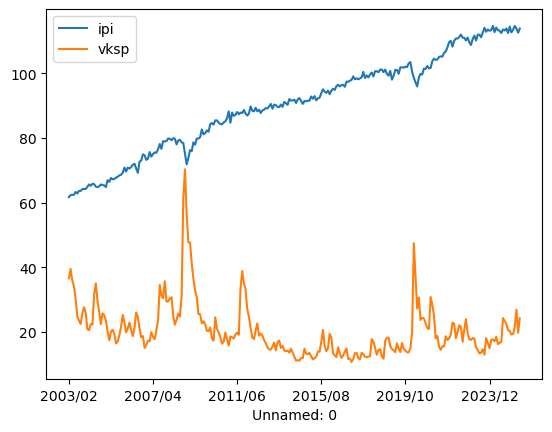

In [ ]:
temp[['ipi', 'vksp']].plot() # 산업생산 큰 하락 있었던 시기에 vkospi도 급등했던 것으로 보임

In [74]:
temp.columns

Index(['ipi', '전산업', '제조업', '대기업', '중소기업', '중화학공업', '경공업', '수출기업', '내수기업',
       '비제조업', '서비스업', 'ipi_2', 'ipi_filtered', 'vksp', 'vksp_filtered'],
      dtype='object')

In [77]:
temp['ipi_pct'] = temp['ipi'].pct_change()
temp['vksp_pct'] = temp['vksp'].pct_change()

In [78]:
temp.head(30)

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2,ipi_filtered,vksp,vksp_filtered,ipi_pct,vksp_pct
Unnamed: 0,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN,NaN,36.555000,NaN,NaN,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6,NaN,39.466190,NaN,0.009724,0.079639
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1,NaN,35.959091,NaN,0.001605,-0.088863
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0,NaN,34.055789,NaN,0.000000,-0.052930
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9,NaN,30.306000,NaN,0.014423,-0.110107
2003/07,62.8,91.2,89.3,91.6,90.8,90.3,87.3,88.3,90.5,93.3,88.1,-0.5,NaN,24.868636,NaN,-0.007899,-0.179415
2003/08,63.6,90.3,88.4,94.6,88.6,90.3,81.9,90.2,88.2,92.5,89.9,0.8,NaN,23.559000,NaN,0.012739,-0.052662
2003/09,63.6,98.3,95.6,103.6,94.1,96.8,93.7,101.8,93.5,101.1,98.8,0.0,NaN,22.466842,NaN,0.000000,-0.046358
2003/10,64.2,98.7,100.0,102.0,100.5,101.3,96.7,102.3,99.0,98.4,93.3,0.6,NaN,25.774545,NaN,0.009434,0.147226


### 회귀분석
1. ipi 원자료 ~ vkospi 원자료/전월비(변화율)/bk필터
2. ipi 1차 차분 ~ vkospi 원자료/전월비(변화율)/bk필터
3. ipi bk 필터 ~ vkospi 원자료/전월비(변화율)/bk필터

In [ ]:
#원자료~원자료
reg1 = sm.OLS(temp['ipi'], temp['vksp'], missing='drop').fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ipi   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              1042.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                    2.35e-94
Time:                        13:00:21   Log-Likelihood:                         -1383.4
No. Observations:                 269   AIC:                                      2769.
Df Residuals:                     268   BIC:                                      2772.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vksp           3.6986      0.115     32.287      0.000       3.473       3.924
==============================================================================
Omnibus:                       92.633   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.708
Skew:                          -1.568   Prob(JB):                     4.91e-56
Kurtosis:                       6.590   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
from statsmodels.tools.eval_measures import rmse
rmse_1 = rmse(temp['ipi'].dropna(), reg1.fittedvalues)
print(rmse_1)

41.41710922419802


In [ ]:
#ipi 1차 차분 / vkospi 원자료
reg2 = sm.OLS(temp['ipi_2'], temp['vksp'], missing='drop').fit()
rmse_2 = rmse(temp['ipi_2'].dropna(), reg2.fittedvalues)
print(reg2.rsquared, rmse_2, sep='\n')

0.01603014956083315
1.1210386976338598


In [80]:
#ipi filtered / vkospi 원자료
reg = sm.OLS(temp['ipi_filtered'], temp['vksp'], missing='drop').fit()
rmse = rmse(temp['ipi_filtered'].dropna(), reg.fittedvalues)
print(reg.rsquared, rmse, sep='\n')

0.011030819416145476
0.00872201184294799


In [95]:
#ipi filtered / vkospi filtered
reg = sm.OLS(temp['ipi'], temp['vksp'], missing='drop').fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ipi   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              1042.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                    2.35e-94
Time:                        13:14:28   Log-Likelihood:                         -1383.4
No. Observations:                 269   AIC:                                      2769.
Df Residuals:                     268   BIC:                                      2772.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vksp           3.6986      0.115     32.287      0.000       3.473       3.924
==============================================================================
Omnibus:                       92.633   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.708
Skew:                          -1.568   Prob(JB):                     4.91e-56
Kurtosis:                       6.590   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
rmse = rmse(temp['ipi_filtered'].dropna(), reg.)
print(reg.rsquared, rmse, sep='\n')

SyntaxError: invalid syntax (336885615.py, line 1)